Récupération des fichiers cascade

In [14]:
!wget https://github.com/opencv/opencv/raw/master/data/haarcascades/haarcascade_frontalface_default.xml
!wget https://github.com/opencv/opencv/raw/master/data/haarcascades/haarcascade_frontalface_alt.xml

--2024-11-26 13:18:53--  https://github.com/opencv/opencv/raw/master/data/haarcascades/haarcascade_frontalface_default.xml
Resolving github.com (github.com)... 140.82.116.3
Connecting to github.com (github.com)|140.82.116.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml [following]
--2024-11-26 13:18:53--  https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 930127 (908K) [text/plain]
Saving to: ‘haarcascade_frontalface_default.xml.1’

haarcascade_frontal 100%[===================>] 908.33K  --.-KB/s    in 0.04s   

20

In [9]:
import cv2
import sys
from matplotlib import pyplot as plt

imagePath = r'marathon.jpeg'
# Récupération de fichiers préconfigurés : https://github.com/opencv/opencv/tree/3.4/data/haarcascades
cascadefile = "haarcascade_frontalface_default.xml"
classCascade = cv2.CascadeClassifier(cascadefile)
if classCascade.empty():
    print("Erreur : le fichier cascade n'a pas pu être chargé.")

un peu d'info sur https://docs.opencv.org/3.4/db/d28/tutorial_cascade_classifier.html

# Image a analyser

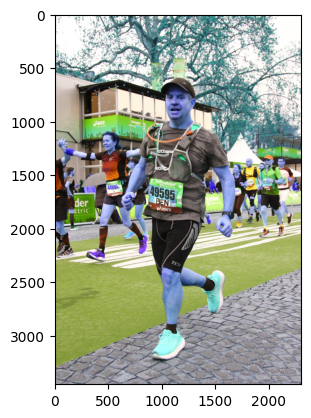

In [10]:
image = cv2.imread(imagePath)
plt.imshow(image)

# Récupération de l'image et conversion Greyscale

Transformations dans l'espace RVB telles que l'ajout / la suppression du canal alpha, l'inversion de l'ordre des canaux, la conversion vers / depuis la couleur RVB 16 bits (R5: G6: B5 ou R5: G5: B5), ainsi que la conversion vers / depuis l'échelle de gris en utilisant:

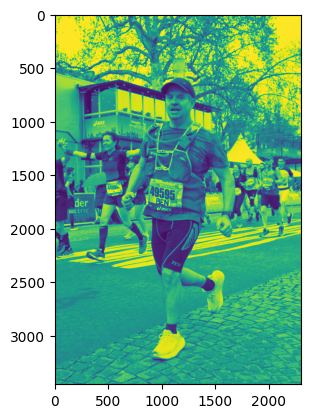

In [11]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray)

In [12]:
faces = classCascade.detectMultiScale(
    gray,
    scaleFactor=1.1,
    minNeighbors=5,
    minSize=(30, 30),
    flags = cv2.CASCADE_SCALE_IMAGE
)
print("Il y a {0} visage(s).".format(len(faces)))

Il y a 13 visage(s).


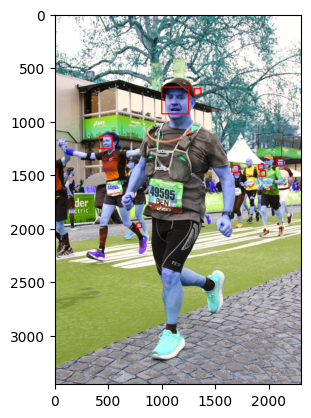

In [18]:
# Dessine des rectangles autour des visages trouvés
for (x, y, w, h) in faces:
    cv2.rectangle(image, (x, y), (x+w, y+h), (255, 0, 0), thickness=10)

plt.imshow(image)

Aïe il y beaucoup de "visages" en trop semble-t-il

# Changeons de modèle

Il y a 8 visage(s).


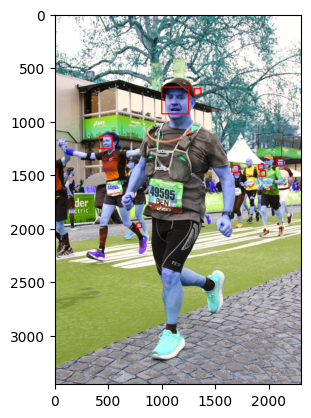

In [25]:
image = cv2.imread(imagePath)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cascadefile = "haarcascade_frontalface_alt.xml"
classCascade = cv2.CascadeClassifier(cascadefile)
faces = classCascade.detectMultiScale(
    gray,
    scaleFactor=1.1,
    minNeighbors=5,
    minSize=(30, 30),
    flags = cv2.CASCADE_SCALE_IMAGE
)
print("Il y a {0} visage(s).".format(len(faces)))
for (x, y, w, h) in faces:
    cv2.rectangle(image, (x, y), (x+w, y+h), (255, 0, 0), thickness=10)

plt.imshow(image)

C'est bien mieux !

# Découpons le visage que nous avons trouvé

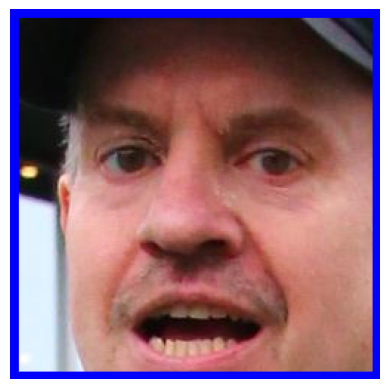

In [23]:
# Sélectionner le plus grand visage
if len(faces) > 0:
    # Trouver le rectangle correspondant au plus grand visage
    largest_face = max(faces, key=lambda rect: rect[2] * rect[3])  # rect[2]*rect[3] = largeur * hauteur
    x, y, w, h = largest_face

    # Découper uniquement le visage
    largest_face_image = image[y:y+h, x:x+w]

    # Afficher le plus grand visage
    plt.imshow(cv2.cvtColor(largest_face_image, cv2.COLOR_BGR2RGB))
    plt.axis('off')  # Supprimer les axes pour une meilleure visualisation
    plt.show()
else:
    print("Aucun visage détecté.")

... et sauvegardons le dans un fichier !

In [24]:
i=0
for (x, y, w, h) in faces:
    cv2.imwrite('fichier_resultat_' + str(i) + '.jpg', image[y:y+h, x:x+w])
    i = i+1